**Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.**

There are five basic steps when you’re implementing linear regression:

1) Import the packages and classes that you need.
2) Provide data to work with, and eventually do appropriate transformations.
3) Create a regression model and fit it with existing data.
4) Check the results of model fitting to know whether the model is satisfactory.
5) Apply the model for predictions.
These steps are more or less general for most of the regression approaches and implementations.

**Step 1: Import packages and classes**

The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

**Step 2: Provide data**

The second step is defining data to work with. The inputs (regressors, 𝑥) and output (response, 𝑦) should be arrays or similar objects. This is the simplest way of providing data for regression:

In [ ]:
 x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
 y = np.array([5, 20, 14, 32, 22, 38])
 print(x)

 print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


**Step 3: Create a model and fit it**

The next step is to create a linear regression model and fit it using the existing data.

Create an instance of the class LinearRegression, which will represent the regression model:

In [ ]:
model = LinearRegression().fit(x, y)

**Step 4: Get results**

Once the model is fitted, we can get the results to check whether the model works satisfactorily and to interpret it.

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 5.633333333333329
slope: [0.54]


**Step 5: Predict response**

Once we have a satisfactory model, then we can use it for predictions with either existing or new data. To obtain the predicted response, use .predict():

In [ ]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


To get started, let’s simulate some data and look at how the predicted values (Yₑ) differ from the actual value (Y):

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head(10)

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107
5,-0.943195,2.688852
6,3.875221,2.955757
7,1.121607,1.962755
8,1.241953,3.334057
9,2.526496,3.498206


There are two kinds of variables in a linear regression model:

The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
The output variable is the variable that we want to predict. It is commonly referred to as Y.
To estimate Y using linear regression, we assume the equation:

**Yₑ = α + β X**

where Yₑ is the estimated or predicted value of Y based on our linear equation.

Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ.

If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X.

In [ ]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


In [ ]:
ypred = alpha + beta * X

In [ ]:
print(ypred)

[3.91178282 2.81064315 3.27775989 4.29675991 3.99534802 1.69857201
 3.25462968 2.36537842 2.40424288 2.81907292 2.60387001 3.66168312
 3.10199975 2.58581077 2.84592918 2.75696825 3.69382011 2.32194218
 2.74033151 1.79802302 0.42642221 3.015275   3.18547843 1.88839019
 4.32006116 1.31339555 2.52451965 2.33645381 3.72506464 3.67386219
 2.61267323 2.79288576 1.77082341 0.88838207 2.20668994 2.61380476
 3.48085076 3.45831697 2.17486854 2.24351265 1.64102813 1.34112617
 1.11002064 4.06253353 2.07610925 2.1338976  1.47613319 3.11528277
 1.18459738 2.31582084 1.76462232 2.79994197 2.07517841 1.53439407
 2.46482364 2.83338994 2.54127917 2.73177699 1.9754571  2.19471775
 1.94466613 2.19729158 1.83108353 1.09386364 2.6308214  2.16319902
 1.17143718 2.86120343 1.75506992 2.52951462 3.07620724 2.59171079
 3.40747079 1.49064088 2.81240675 1.93469565 1.78453915 2.02024272
 2.23604485 2.53292159 1.54689373 3.2148581  2.86352875 1.24729141
 3.68911579 4.01822118 3.43926331 2.34231437 1.62310525 3.3388

Let’s plot our prediction ypred against the actual values of y, to get a better visual understanding of our model.



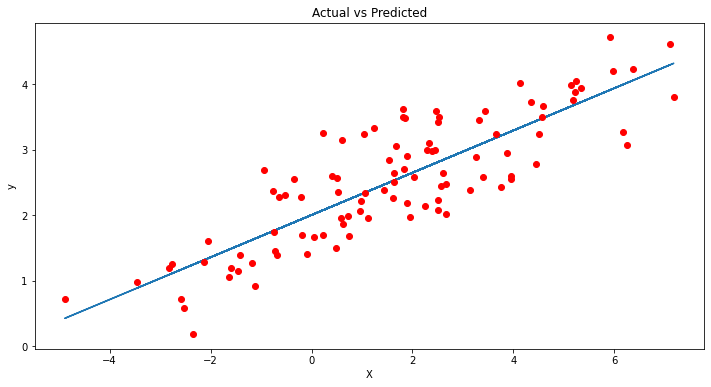

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

**Linear Regression with statsmodels**

In [ ]:
# Import and display first five rows of advertising dataset
advert = pd.read_csv('/content/drive/MyDrive/advertising.csv')
advert.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


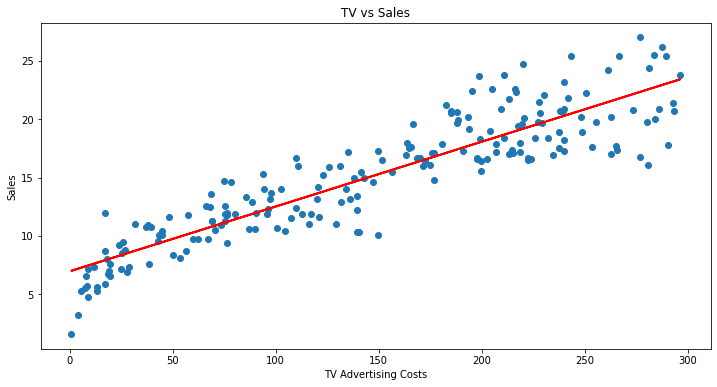

In [ ]:
# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(advert['TV'], advert['Sales'], 'o')           # scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

In [ ]:
new_X = 500
model.predict({"TV": new_X})

0    34.707207
dtype: float64

**Linear Regression with scikit-learn**

In [ ]:

from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 4.630879464097768
betas = [0.05444896 0.10717457]


In [ ]:
model.predict(X)

array([21.21078412, 11.26581887, 10.48671441, 17.30620681, 15.63273693,
       10.34542196, 11.27702065, 13.27626614,  5.32420713, 15.7884357 ,
        8.85156828, 18.89326105,  9.68859218, 10.75417988, 19.26995575,
       20.38243344, 12.24510831, 24.19693004, 10.59582626, 15.21268363,
       19.49126811, 18.10365306,  7.05368143, 18.87282745,  9.37344932,
       19.32062224, 15.55185089, 19.49389028, 21.08221178, 10.18976923,
       23.61202043, 12.64300467, 10.0840803 , 21.23601486,  9.99168941,
       20.89860809, 23.85755331, 13.99264065,  9.83919073, 21.08572385,
       18.04678695, 17.8479762 , 23.58582996, 16.79663584,  8.75193486,
       16.57632034, 10.5759795 , 22.14092985, 18.69504157,  9.52745742,
       15.84202299, 11.12643101, 20.88281419, 19.52472489, 22.0212491 ,
       20.75520158,  8.03996233, 14.10457969, 21.42457912, 19.26492534,
        7.75824801, 23.4347471 , 19.32172162, 13.39515504, 16.35620987,
        9.38458127,  8.98251618, 13.76965098, 20.50436345, 21.14

In [ ]:
new_X = [[300, 200]]
print(model.predict(new_X))

[42.40048195]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
